<ipython-input-1-263265f49d9d>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill missing values
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


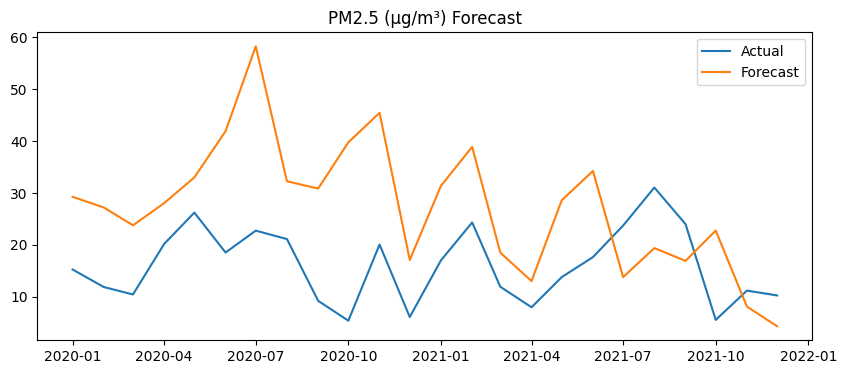

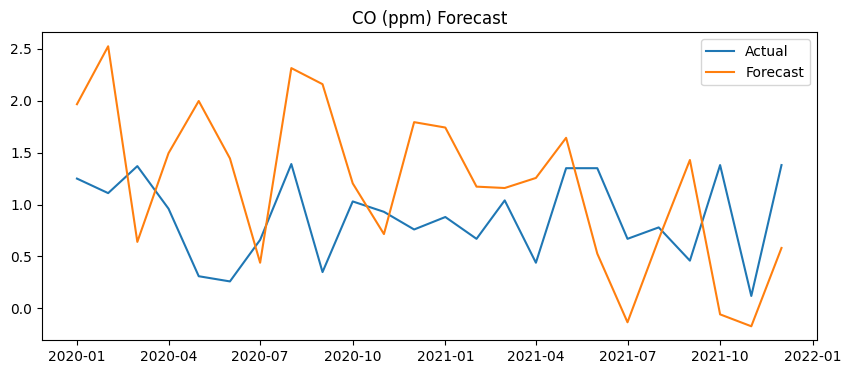

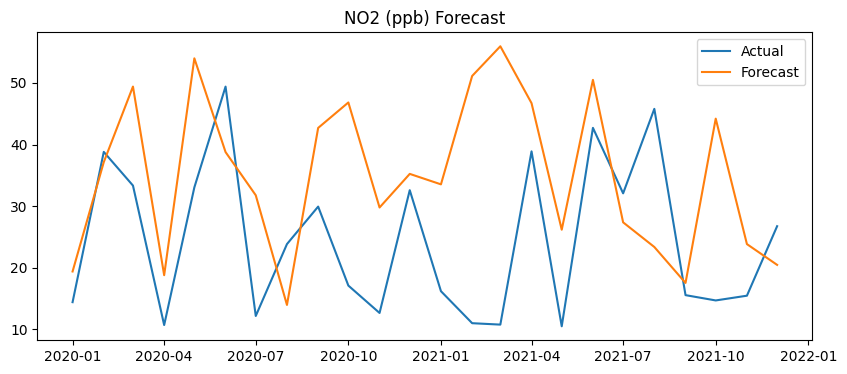

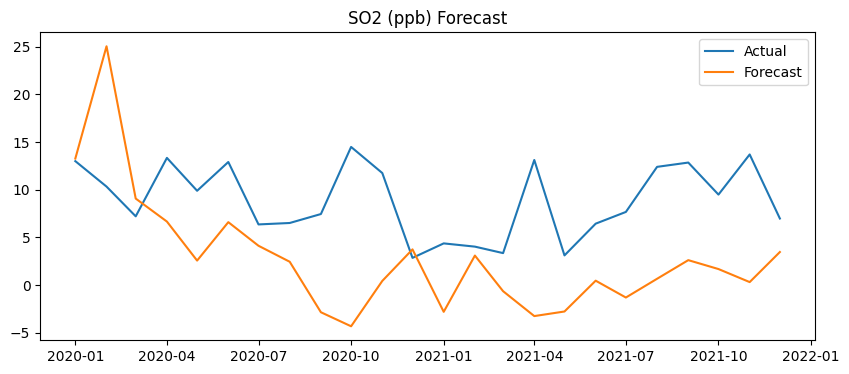

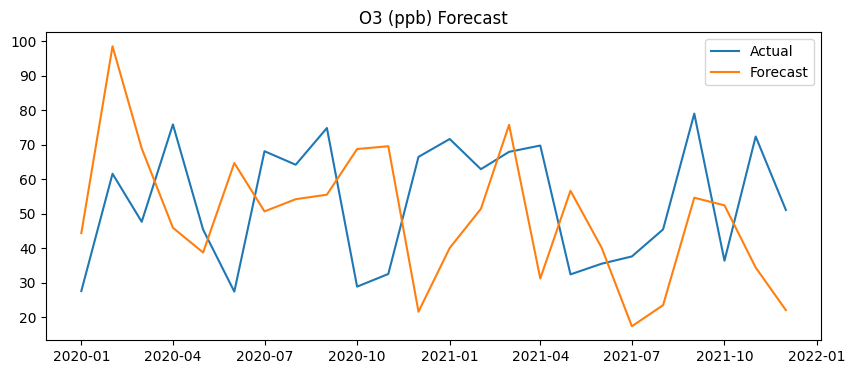

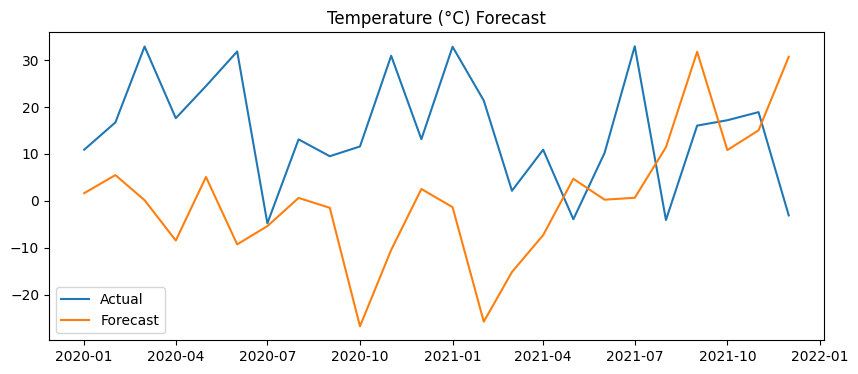

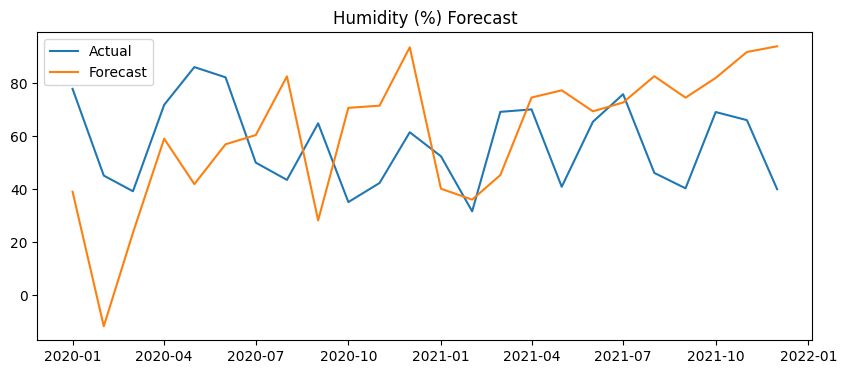

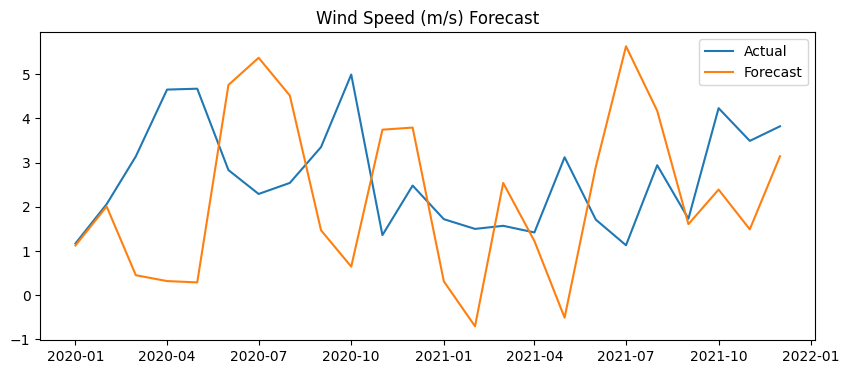

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("/content/us_air_pollution_2012_2021.csv")

# Step 2: Convert Year and Month to datetime
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
data.set_index('Date', inplace=True)

# Step 3: Drop unnecessary columns
data = data.drop(columns=['Year', 'Month'])

# Step 4: Handle missing values if any
data = data.fillna(method='ffill')  # Forward fill missing values

# Step 5: Split into train and test
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 6: Fit VAR model
model = VAR(train)
lag_order = model.select_order().aic  # You can use BIC, FPE, etc.
model_fitted = model.fit(lag_order)

# Step 7: Forecasting
forecast_input = train.values[-lag_order:]
forecast_steps = len(test)

forecast = model_fitted.forecast(y=forecast_input, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=data.columns)

# Step 8: Plot predictions vs actual
for col in data.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(test.index, test[col], label='Actual')
    plt.plot(forecast_df.index, forecast_df[col], label='Forecast')
    plt.title(f'{col} Forecast')
    plt.legend()
    plt.show()